In [ ]:
'''
Для выбранного датасета с сайта https://github.com/YBI-Foundation/Dataset 

1. Постройте столбчатую диаграмму
2. Постройте гистограмму с распределением числовой переменной
3. Постройте точечную диаграмму для двух числовых переменных
4. Постройте тепловую карту для двух категориальных переменных
5. Прокомментируйте для каждого графика, какие бизнес-выводы можно по ним сделать?

Срок до 4 октября 2024 г
'''

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  matplotlib.colors import LinearSegmentedColormap

In [329]:
df_Bike_Prices = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Bike%20Prices.csv")

In [330]:
df_Bike_Prices = df_Bike_Prices.drop_duplicates()
df_Bike_Prices = df_Bike_Prices[df_Bike_Prices['Year'] != 2020] # 2020 год исключаем, т.к. он не полный 
df_Bike_Prices

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN


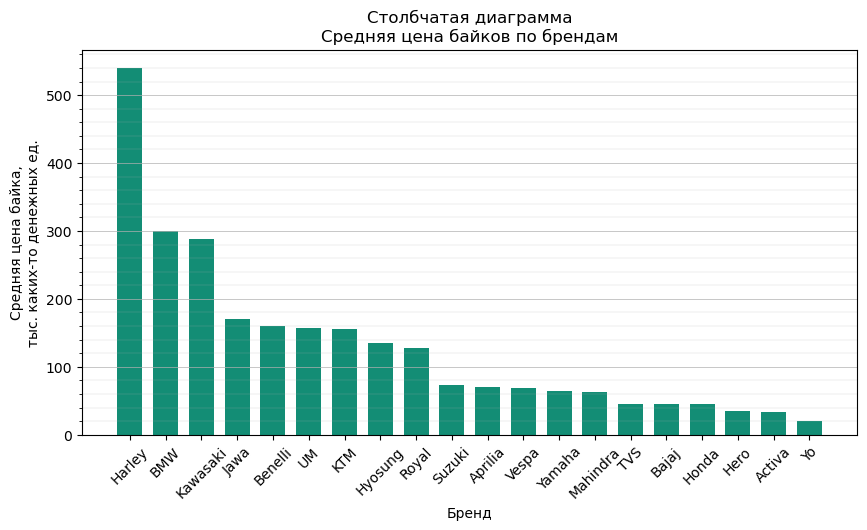

In [331]:
# 1. Постройте столбчатую диаграмму

df1 = (
    df_Bike_Prices 
    .groupby(['Brand'])['Selling_Price'].mean() # Группируем по бренду и считаем среднюю цену 
    .sort_values(ascending=False) # Сортируем по убыванию значений 
    .reset_index() # Без этого метода выдаёт ошибку: KeyError: 'Brand' 
)

plt.figure(figsize=(10, 5)) # Пробуем подобрать оптимальную длину и ширину диаграммы 
plt.bar(df1['Brand'], df1['Selling_Price']/1000, width = 0.7, color='#138D75') 
plt.title('Столбчатая диаграмма' + '\n' + 'Средняя цена байков по брендам') 
plt.xlabel('Бренд') # Название оси X 
plt.xticks(rotation=45) # Немного наклоняем подписи оси X, чтобы удобно было читать 
#plt.ylim(0, 600) # Указываем диапазон значений оси Y (но можно и не указывать) 
plt.ylabel('Средняя цена байка,' + '\n' + 'тыс. каких-то денежных ед.') # Название оси Y 
plt.minorticks_on() # Включаем режим отображения минорной сетки 
plt.grid(axis='y', which='major', linewidth = 0.5) # Указываем толщину линий сетки для оси Y 
plt.grid(axis='y', which='minor', linewidth = 0.15) 
plt.gca().tick_params(axis='x', which='minor', bottom=False) # Отключаем минорные отметки на оси X 
plt.show() 


In [217]:
# Ну здесь и так всё видно, какие байки самые дорогие, а какие дешёвые, т.е. от премиума до народных брендов. 

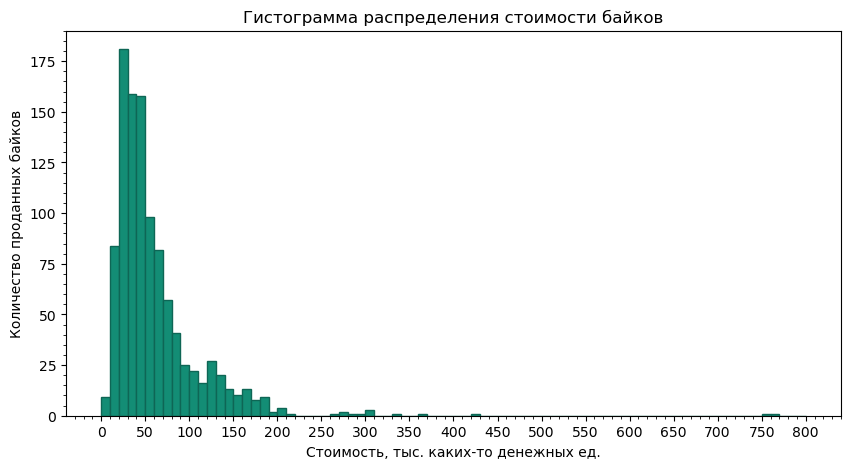

In [332]:
# 2. Постройте гистограмму с распределением числовой переменной 

# Попробуем проанализировать продажи байков в зависимости от их стоимости 
df2 = df_Bike_Prices[['Selling_Price']] 

plt.figure(figsize=(10, 5)) 
plt.title('Гистограмма распределения стоимости байков') 
plt.hist(df2, bins=80, range=(0, 800000), color='#138D75', edgecolor = '#0E6655') 
# Указываем количество столбцов 80 и даипазон цен от 0 до 800 тыс., чтобы каждый столбец у нас был 10 тыс. 
plt.xticks(ticks=range(0,850000,50000), labels=range(0,850,50)) # Устанавливаем метки оси X (делим стоимость на 1000) 
plt.minorticks_on() 
plt.xlabel('Стоимость, тыс. каких-то денежных ед.') 
plt.ylabel('Количество проданных байков') 
plt.show() 


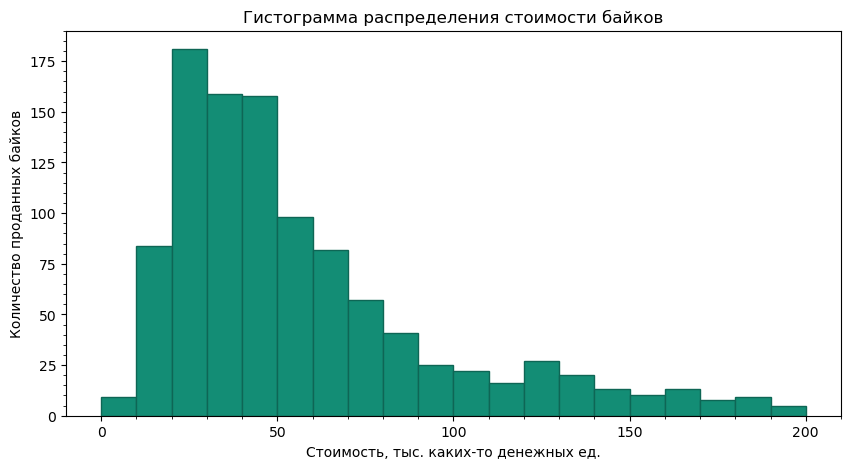

In [333]:
# Уменьшенный вариант с диапазоном цен 0 - 200 тыс. 

plt.figure(figsize=(10, 5)) 
plt.title('Гистограмма распределения стоимости байков') 
plt.hist(df2, bins=20, range=(0, 200000), color='#138D75', edgecolor = '#0E6655') 
plt.xticks(ticks=range(0,250000,50000), labels=range(0,250,50)) 
plt.minorticks_on() 
plt.xlabel('Стоимость, тыс. каких-то денежных ед.') 
plt.ylabel('Количество проданных байков') 
plt.show() 

In [47]:
# Из полученных гистограмм можно сделать выводы: 
# 1. Популярная цена байков находится в диапазоне: 20 - 50 тыс. 
# 2. От 190 тыс. продажи байков незначительные, единичные. 

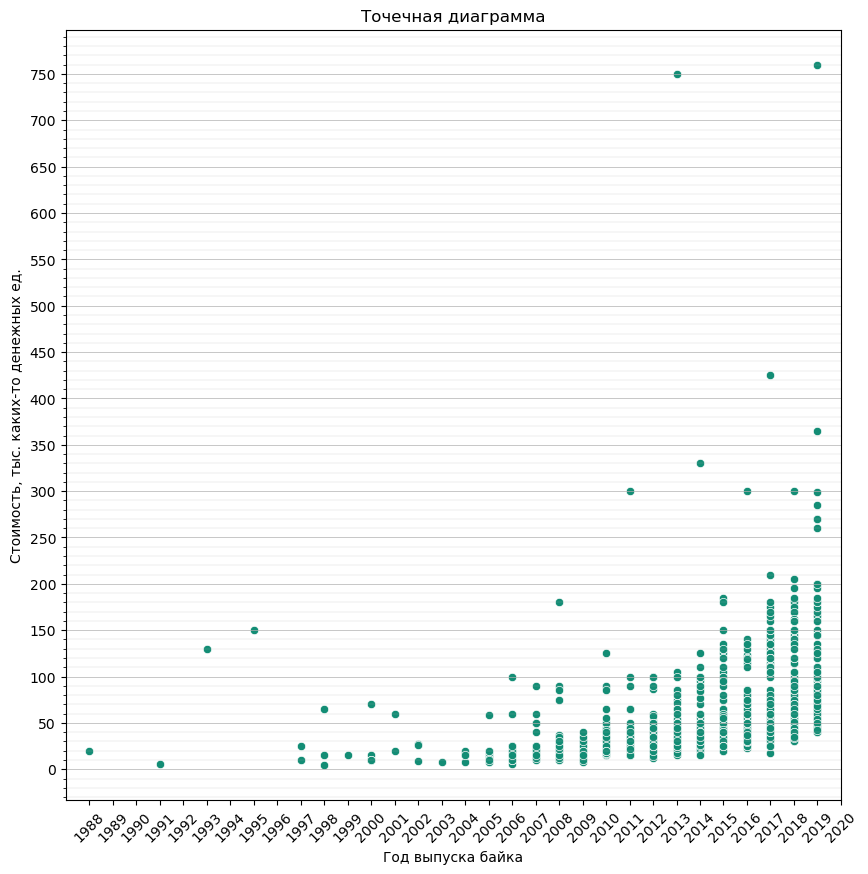

In [382]:
# 3. Постройте точечную диаграмму для двух числовых переменных 

df3 = df_Bike_Prices[['Year', 'Selling_Price']] 

plt.figure(figsize=(10, 10)) 
plt.title('Точечная диаграмма') 
plt.xlabel('Год выпуска байка') 
plt.ylabel('Стоимость, тыс. каких-то денежных ед.') 
plt.xticks(ticks=range(1988,2021), rotation=45) 
plt.xlim(1987, 2020)
plt.yticks(ticks=range(0,800000,50000), labels=range(0,800,50)) 
plt.minorticks_on()
plt.grid(axis='y', which='major', linewidth = 0.5)  
plt.grid(axis='y', which='minor', linewidth = 0.15) 
plt.gca().tick_params(axis='x', which='minor', bottom=False)

sns.scatterplot(data = df3, x = 'Year', y = 'Selling_Price', color='#138D75')
plt.show()

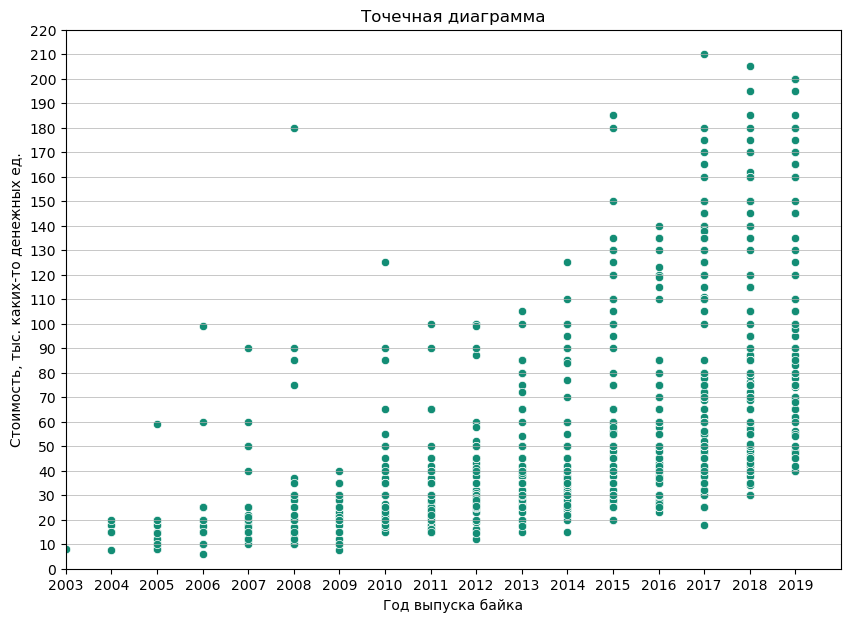

In [363]:
# Диаграмма в приближённом масштабе (простым способом) 

plt.figure(figsize=(10, 7)) 
plt.title('Точечная диаграмма') 
plt.xlabel('Год выпуска байка') 
plt.ylabel('Стоимость, тыс. каких-то денежных ед.') 
plt.xticks(ticks=range(2003,2020), rotation=0) 
plt.xlim(2003, 2020)
plt.ylim(0, 220000)
plt.yticks(ticks=range(0,230000,10000), labels=range(0,230,10)) 
plt.grid(axis='y', which='major', linewidth = 0.5)  

sns.scatterplot(data = df3, x = 'Year', y = 'Selling_Price', color='#138D75')
plt.show()

In [372]:
# Диаграмма в приближённом масштабе (с вычислением выбросов по значениям осей, т.е. 'Selling_Price' и 'Year') 

q1 = df_Bike_Prices['Selling_Price'].quantile(0.25)
q3 = df_Bike_Prices['Selling_Price'].quantile(0.75)
iqr = q3 - q1
SP_lower_bound = q1 - 1.5*iqr
SP_upper_bound = q3 + 1.5*iqr
if SP_lower_bound < 0: 
    SP_lower_bound = 0 # т.к. цена у нас не может быть < 0 
print(f"Selling_Price: [{SP_lower_bound}, {SP_upper_bound}]")

q1 = df_Bike_Prices['Year'].quantile(0.25)
q3 = df_Bike_Prices['Year'].quantile(0.75)
iqr = q3 - q1
Year_lower_bound = int(q1 - 1.5*iqr)
Year_upper_bound = int(q3 + 1.5*iqr)
print(f"Year: [{Y_lower_bound}, {Y_upper_bound}]")


Selling_Price: [0, 133000.0]
Year: [2002, 2026]


In [383]:
# Непонятно, как мог получиться 2026 год!? 
# Что-то я не понял или неправильно сделал, или пропустил на лекции. 
# Хотел сделать правильно, но придётся делать так: 
Year_upper_bound = df_Bike_Prices['Year'].max() + 1


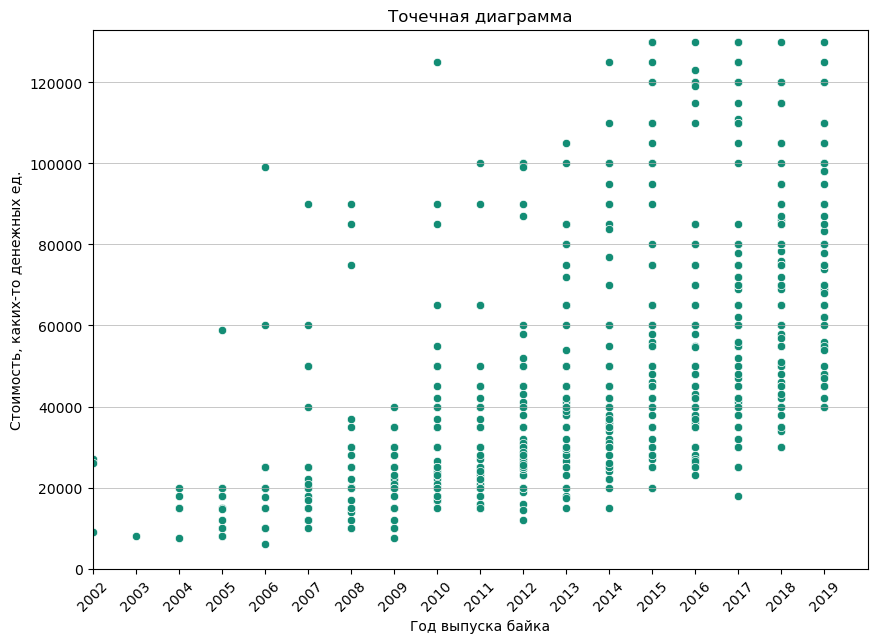

In [384]:
plt.figure(figsize=(10, 7)) 
plt.title('Точечная диаграмма') 
plt.xlabel('Год выпуска байка') 
plt.ylabel('Стоимость, каких-то денежных ед.') 
plt.xticks(ticks=range(Year_lower_bound,Year_upper_bound), rotation=0) 
plt.xlim(Year_lower_bound, Year_upper_bound) 
plt.ylim(0, SP_upper_bound) 
plt.grid(axis='y', which='major', linewidth = 0.5) 
plt.xticks(rotation=45) 

sns.scatterplot(data = df3, x = 'Year', y = 'Selling_Price', color='#138D75')
plt.show()

In [401]:
# 1. Более новые байки - более дорогие. 
# 2. Начальная (минимальная) цена более новых байков выше, чем цена более старых байков. 


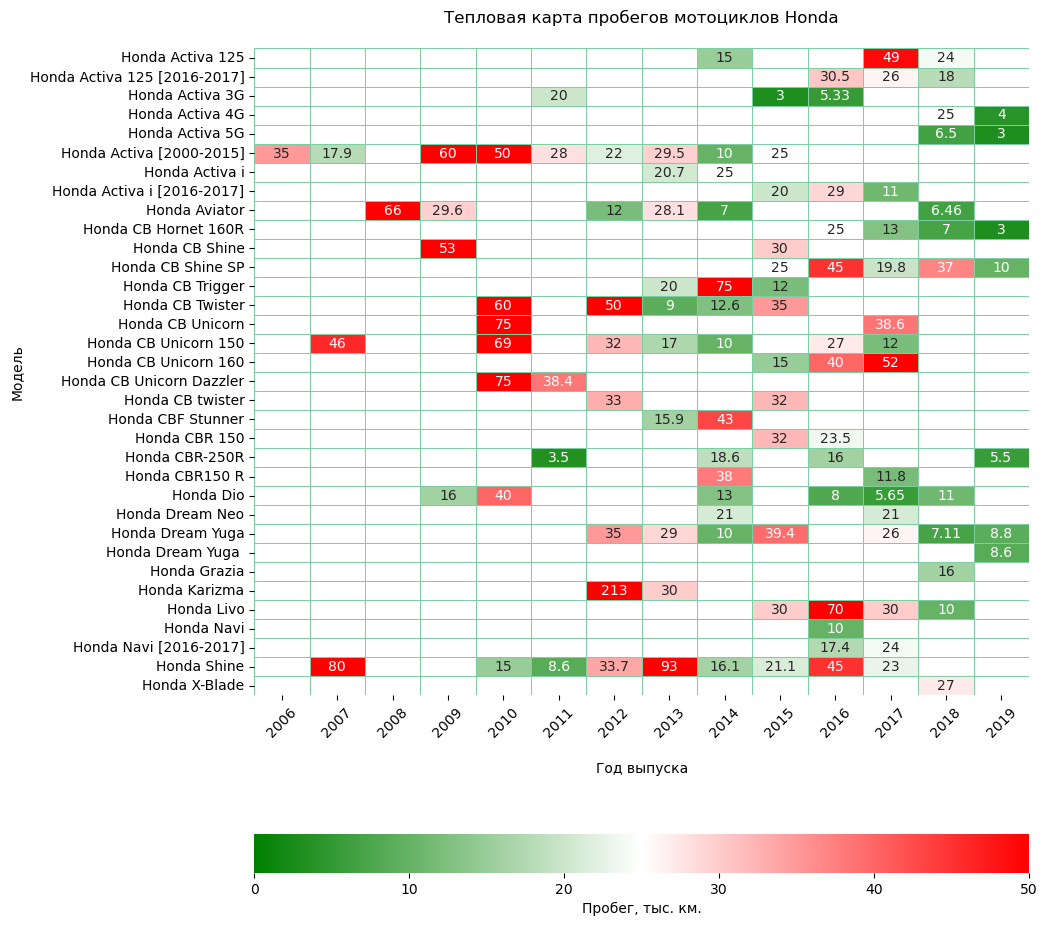

In [392]:
# 4. Постройте тепловую карту для двух категориальных переменных

# Надо придумать, что будет холодным, а что будет горячим, а у меня с фантацией плохо. 
# Поэтому, попробуем сделать тепловую карту по пробегу байков (KM_Driven), например, для моделей Хонды. 

df4 = (
    df_Bike_Prices[df_Bike_Prices['Brand'].isin(['Honda'])] # Выбрали Хонду. 
    .groupby(['Model', 'Year']) # Группируем по модели и году выпуска. 
    ['KM_Driven'].min() # Находим минимальный пробег. 
    .unstack() # Без этого параметра выдаёт ошибку. 
    /1000 # На тепловой карте будем выводить значения в тыс. км., поэтому делим на 1000. 
)

plt.figure(figsize=(10, 12)) 
plt.title('Тепловая карта пробегов мотоциклов Honda' + '\n') 

sns.heatmap(
    df4, 
    #cmap='YlOrRd', # Задаём цветовую схему (https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html)
    # Вот такую ещё штуку нагуглил: 
    cmap=LinearSegmentedColormap.from_list('gr',["g", "w", "r"]), 
    # Хотелось выделить небольшие пробеги - зелёным, а большие - красным. 
    annot=True, # Включаем отображение значений внутри ячеек. 
    fmt='.3g', # Количество знаков после запятой. 
    # Этот параметр ещё как-то влияет на стиль отображения значений. 
    # Методом перебора между .1g, .2g, .3g решил, что мне подходит .3g 
    vmin=0, vmax=50, # Задаём диапазон пробегов байков в тыс. км. (пробеги > 50 тыс. км. нас не интересуют). 
    # Опытным путём установил, что значения, которые больше vmax окрашиваются в цвет верхней границы. 
    linewidths=0.5, linecolor='#7DCEA0', # Рисуем сетку. 
    cbar_kws= {'label': 'Пробег, тыс. км.', 'orientation': 'horizontal'}, # Такой параметр ещё нагуглил.     
)

plt.xlabel('\n'+'Год выпуска') 
plt.ylabel('Модель') 
plt.xticks(rotation=45) 
# А вот подписи надо указывать ниже sns.heatmap, т.к. если указать выше, то почему-то не работает. 

plt.show()


In [ ]:
# Опять надо придумать какой-то вывод. 
# Глядя на карту можно найди модели с минимальными пробегами (зелёные ячейки), которые можно рассмотреть к покупке. 
# Но с другой стороны, если Honda Karizma 2012 г.в. может проехать 213 тыс. км., то это очень круто 
# и можно рассмотреть к покупке более новую Каризму 2013 г.в. но с пробегом всего 30 тыс. км.! 
# В итоге, самый правильный вывод: покупать надо новую технику, вообще без пробега! 

In [ ]:
# Всё, фантазия закончилась, готово! 